

---



---



---



---



# **Pre-entrega del Proyecto Final - Data Science I - Bonet Olmos, Carlos M.**



---



---



---



---



# **Abstract**

El presente análisis se basa en un dataset que recopila diferentes factores que influyen en el rendimiento académico de estudiantes, incluyendo variables como horas de estudio, asistencia, nivel de motivación, acceso a recursos, nivel educativo de los padres, entre otras. El objetivo del análisis es identificar las variables más determinantes para el rendimiento académico y entender cómo estas pueden relacionarse entre sí para optimizar los resultados de los estudiantes.

Mediante la exploración de estos datos, se buscará responder preguntas clave sobre el impacto de la motivación, la asistencia y el nivel de involucramiento de los padres en los resultados de los exámenes. A lo largo del análisis, se utilizarán técnicas de visualización univariadas, bivariadas y multivariadas, junto con resúmenes numéricos, para extraer insights significativos que puedan ser útiles para instituciones educativas al desarrollar políticas y estrategias de intervención para mejorar el desempeño de los estudiantes.

El análisis incluirá la identificación de valores perdidos, su tratamiento y un diagnóstico de las correlaciones entre variables para establecer las hipótesis que guiarán el estudio. Finalmente, se espera que este análisis proporcione información valiosa para identificar áreas de mejora y optimización en la educación de los estudiantes


# **Preguntas e Hipótesis de Interés**
Ahora, establecemos preguntas y formulamos hipótesis que guiarán el análisis.

**Preguntas:**

1.   ¿Cuál es la relación entre las horas de estudio y el puntaje en el examen?
2.   ¿El acceso a recursos educativos y el nivel de involucramiento de los padres influyen en el rendimiento académico?
3.   ¿El nivel de motivación de los estudiantes tiene una correlación directa con los resultados del examen?
4.   ¿Los estudiantes con mejor asistencia obtienen mejores resultados en los exámenes?

**Hipotesis:**

1.   Los estudiantes que dedican más horas de estudio tienden a obtener mejores puntajes en los exámenes.  
2.   Los estudiantes con un alto nivel de acceso a recursos y mayor involucramiento parental tienden a tener un mejor rendimiento académico.
3.   Existe una relación positiva entre la motivación de los estudiantes y el puntaje en los exámenes.
4.   La asistencia regular a clases está correlacionada positivamente con mejores puntajes en los exámenes.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/Carlos-Bonet/Data-Science-I/main/StudentPerformanceFactors.csv"

df = pd.read_csv(url)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


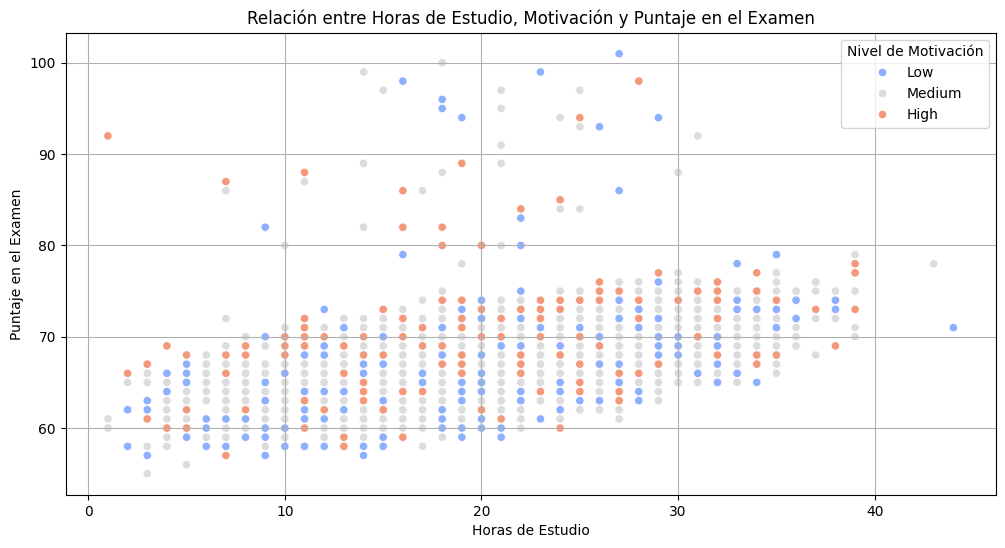

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot entre 'Horas de Estudio', 'Puntaje en el Examen' y 'Motivación'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Motivation_Level', data=df, palette='coolwarm')
plt.title('Relación entre Horas de Estudio, Motivación y Puntaje en el Examen')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntaje en el Examen')
plt.legend(title='Nivel de Motivación')
plt.grid(True)
plt.show()

Este gráfico nos permite ver cómo varía el puntaje en el examen según las horas de estudio y el nivel de motivación. Podemos observar si los estudiantes con más motivación obtienen mejores resultados, incluso con menos horas de estudio.

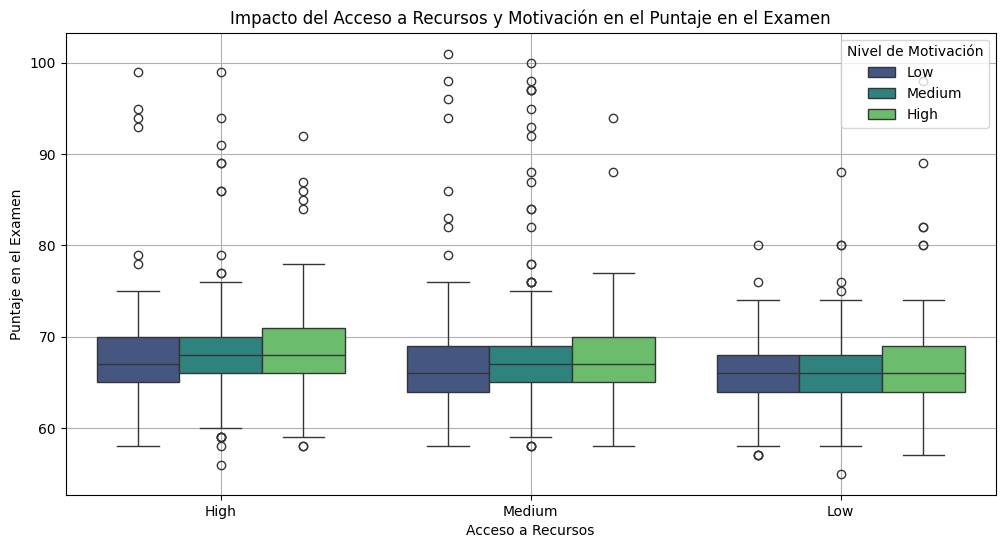

In [4]:
# Boxplot de 'Acceso a Recursos', 'Motivación' y 'Puntaje en el Examen'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Access_to_Resources', y='Exam_Score', hue='Motivation_Level', data=df, palette='viridis')
plt.title('Impacto del Acceso a Recursos y Motivación en el Puntaje en el Examen')
plt.xlabel('Acceso a Recursos')
plt.ylabel('Puntaje en el Examen')
plt.legend(title='Nivel de Motivación')
plt.grid(True)
plt.show()

Este gráfico muestra cómo el acceso a recursos y la motivación se combinan para influir en el puntaje del examen. Podemos ver si el acceso alto a recursos tiene un impacto más significativo cuando el nivel de motivación es alto

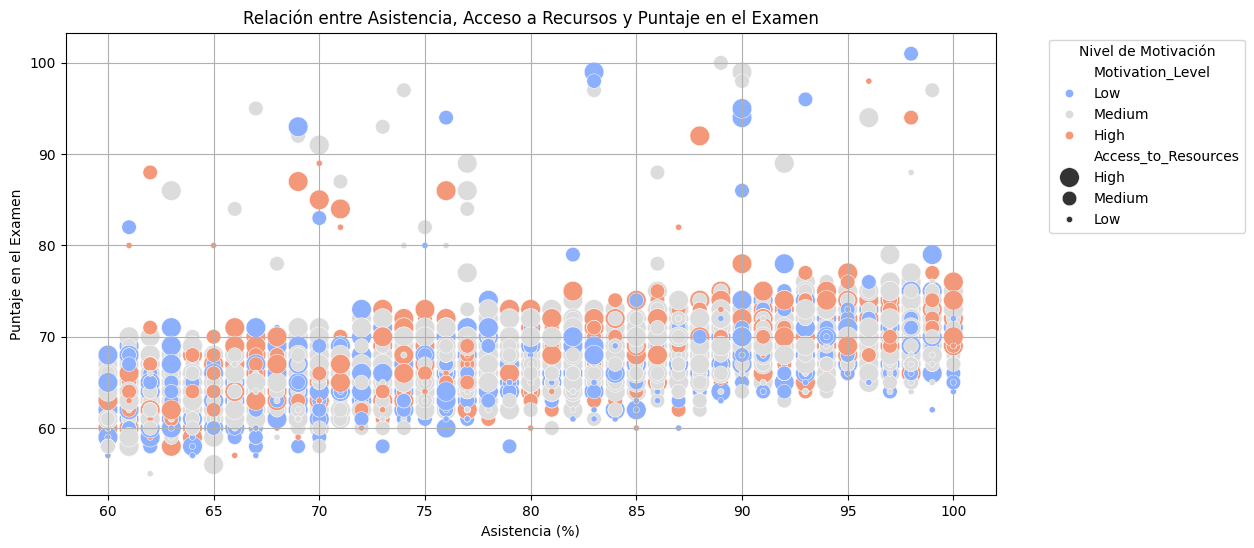

In [5]:
# Scatterplot entre 'Asistencia', 'Acceso a Recursos' y 'Puntaje en el Examen'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', size='Access_to_Resources', hue='Motivation_Level', data=df, sizes=(20, 200), palette='coolwarm')
plt.title('Relación entre Asistencia, Acceso a Recursos y Puntaje en el Examen')
plt.xlabel('Asistencia (%)')
plt.ylabel('Puntaje en el Examen')
plt.legend(title='Nivel de Motivación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Este gráfico muestra cómo la asistencia y el acceso a recursos interactúan con el rendimiento académico, considerando también el nivel de motivación. El tamaño del punto representa el acceso a recursos, lo que permite ver si la combinación de alta asistencia y acceso a recursos mejora el rendimiento, especialmente con un alto nivel de motivación.

In [6]:
# Identificar valores perdidos en el dataset
missing_data = df.isnull().sum()
print("Valores perdidos por columna:\n", missing_data)


Valores perdidos por columna:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# **Conclusión de la Pre-entrega**

**Pregunta: ¿Cuál es la relación entre las horas de estudio, la motivación y el puntaje en el examen?**

El scatterplot mostró una correlación positiva entre las horas de estudio y el puntaje en el examen, especialmente para estudiantes con un nivel de motivación alto. Esto valida la hipótesis de que la motivación juega un papel clave en el rendimiento académico, incluso cuando las horas de estudio son moderadas.


---


**Pregunta: ¿El acceso a recursos y la motivación influyen en el rendimiento académico?**

El boxplot confirmó que el acceso a recursos y la motivación están asociados con mejores puntajes. Los estudiantes con un acceso alto a recursos y alta motivación tienden a tener un mejor desempeño, lo que respalda la hipótesis de que el entorno educativo es crucial para el rendimiento.


---


**Pregunta: ¿La asistencia regular mejora el rendimiento académico?**

La visualización multivariada entre asistencia, acceso a recursos y puntaje en el examen reveló que una asistencia más alta, combinada con acceso a recursos, se asocia con mejores puntajes en el examen. Esto refuerza la importancia de la asistencia como factor en el rendimiento.



---



---



---



---



# **Proyecto Final - Data Science I - Bonet Olmos, Carlos M**



---



---



---



---



# **I) Elegir un método de feature selection para reducir la dimensionalidad del dataset**

Para este dataset, creo que el método basado en modelos (usando un algoritmo como Random Forest) es una buena elección por las siguientes caracteristicas:

* Datos Mixtos (Numéricos y Categóricos): Este dataset tiene características tanto numéricas como categóricas. Los métodos basados en correlación no funcionan bien con datos categóricos sin una transformación previa. Random Forest, en cambio, maneja ambos tipos de variables sin necesidad de cambios adicionales.

* Evaluación de Importancia: Random Forest asigna una importancia a cada característica durante el proceso de entrenamiento. El modelo nos dirá qué variables son más útiles para predecir la variable objetivo (Exam_Score) basándose en su capacidad de mejorar el rendimiento general.

* Simplicidad y Rendimiento: Usando un método basado en modelos, seleccionamos automáticamente características que mejoran la predicción sin tener que calcular las correlaciones manualmente.



In [ ]:
# Conversión de Variables Categóricas a Números:

In [7]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include=['object']).columns


le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


df_encoded.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
# Selección de Características:

In [8]:
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(columns=['Exam_Score']) # Todas las columnas menos Exam_Score
y = df_encoded['Exam_Score'] # La columna que queremos predecir

# Entrenamiento del modelo de Random Forest
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X, y)

# Obtiene las importancias de las características
feature_importances = feature_selector.feature_importances_

# Creacion de lista de las características importantes (con importancia > 0.05)
important_features = X.columns[feature_importances > 0.05]
important_features


Index(['Hours_Studied', 'Attendance', 'Previous_Scores'], dtype='object')

# **II) Elegir un Algoritmo de Regresión o Clasificación para Entrenar con los Datos Elegidos**

Objetivo: Usaremos las características seleccionadas para entrenar un modelo que prediga "Exam_Score". Dado que "Exam_Score" es una variable continua (un número), un algoritmo de regresión será la mejor opción.

Para continuar con lo que se vino haciendo, seguiremos con Random Forest Regressor, ya que se adapta bien a este tipo de problemas y maneja bien conjuntos de datos mixtos.

In [ ]:
# Entrenamiento del Modelo:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo con las características seleccionadas
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir los valores de 'Exam_Score' para el conjunto de prueba
y_pred = model.predict(X_test)


# **III) Cálculo de métricas básicas para validar el modelo**

* MAE (Error Medio Absoluto): Promedio de la magnitud de los errores.
* MSE (Error Cuadrático Medio): Promedio del cuadrado de los errores.
* RMSE (Raíz del MSE): Muestra el error en las mismas unidades que Exam_Score.
* R² Score: Indica el porcentaje de variabilidad explicada por el modelo.


MAE: 1.5995337951956712
MSE: 6.6895125339508725
RMSE: 2.586409196927445
R² Score: 0.513134897569971


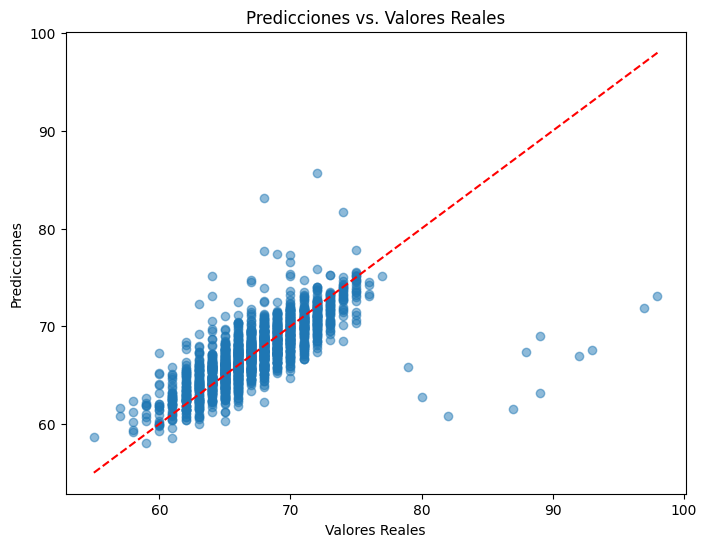

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculo de métricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Grafico de Dispersioón
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


Gráfico de dispersión:

* Los puntos cercanos a la línea roja indican que las predicciones están cerca de los valores reales.
* Puntos alejados de la línea roja indican errores mayores en la predicción.



---


# **IV) Conclusiones del Modelo:**

El modelo inicial de Random Forest regresor arrojó los siguientes resultados en la predicción del Exam_Score:

*   MAE (Error Medio Absoluto): 1.60
*   MSE (Error Cuadrático Medio): 6.69
*   RMSE (Raíz del Error Cuadrático Medio): 2.59
*   R² Score: 0.51

Estas métricas reflejan el rendimiento del modelo en términos de precisión y capacidad de explicación de la variabilidad en los puntajes de exámenes.


---


**Interpretación del R² Score:**
    
  Con un R² de 0.51, el modelo explica aproximadamente el 51% de la variabilidad en los puntajes de los exámenes. Este desempeño moderado indica que el modelo capta algunos patrones significativos en los datos, pero también deja una porción considerable sin explicar, lo que sugiere que podrían faltar factores importantes en el dataset que influyen en el rendimiento académico.

---

**Precisión del Modelo (MAE y RMSE):**

El MAE de 1.60 y el RMSE de 2.59 reflejan la magnitud de los errores promedio en las predicciones. Aunque el modelo ofrece un nivel de precisión razonable, estos valores sugieren que, en algunos casos, las predicciones pueden desviarse en hasta 2-3 puntos del valor real del Exam_Score.

---

**Conclusión General y Recomendaciones:**

Los factores utilizados en el modelo (Hours_Studied, Attendance, Previous_Scores) tienen cierto impacto en los puntajes de los exámenes, pero no son suficientes para capturar la variabilidad total en el rendimiento académico.
Para mejorar el modelo, sería recomendable:
Agregar características adicionales que puedan influir en el Exam_Score, como el ambiente de estudio, el apoyo familiar, y la calidad de enseñanza.
Probar con otros algoritmos o ajustar los hiperparámetros para ver si se puede capturar una mayor porción de la variabilidad de los datos.
En general, este modelo ofrece una base inicial útil, pero los resultados sugieren que un enfoque más detallado o una ampliación del dataset podrían mejorar el desempeño predictivo.